In [30]:
pip install sunpy

In [31]:
#import required libraries
import astropy
from astropy import wcs
from astropy.io import fits
from astropy.modeling.models import Gaussian2D
import astropy.units as u
from astropy.utils.data import download_file
from astropy.visualization import astropy_mpl_style
import cv2
import glob
import mahotas
import matplotlib.pyplot as plt
import numpy as np
import scipy
import scipy.interpolate
import sunpy
import sunpy.map
import sys
from scipy.interpolate import interp2d, RectBivariateSpline

plt.style.use(astropy_mpl_style)

In [32]:
#load in required fits file. Make sure to use full disk images
im171 = glob.glob('171.fts')
im193 = glob.glob('193.fts')
im211 = glob.glob('211.fts')
imhmi = glob.glob('hmi.fts')

In [33]:
#make sure all required files exist
if im171 == [] or im193 == [] or im211 == [] or imhmi == []:
	print("Not all required files present")
	sys.exit()

In [34]:
#reads in fits files and scales images to a size of 4096. Ensures correct image resolution before processing.

'''Changes: switched interp2d to RectBivariateSpline, changed syntax for np.arrange
to be more compatabile with current python version, changed variable name x to "scaled_array",
added an "if statement" at the end to ensure that image resolutions are correct before processing'''

'''TO FIX: Invalid 'Blank' keyword in header warning'''

scaled_array=np.arange(start = 0, stop = 4096, step = 4)

hdu_number=0
heda=fits.getheader(im171[0],hdu_number)
data= fits.getdata(im171[0], ext=0)/(heda["EXPTIME"])
dn=scipy.interpolate.RectBivariateSpline(scaled_array,scaled_array,data)
data=dn(np.arange(0,4096),np.arange(0,4096))

if len(data) != 4096:
    print("Incorrect image resolution")


In [35]:
#reads in fits files and scales images to a size of 4096. Ensures correct image resolution before processing.

'''TO FIX: Invalid 'Blank' keyword in header warning'''

hedb=fits.getheader(im193[0],hdu_number)
datb= fits.getdata(im193[0], ext=0)/(hedb["EXPTIME"])
dn=scipy.interpolate.RectBivariateSpline(scaled_array,scaled_array,datb)
datb=dn(np.arange(0,4096),np.arange(0,4096))

if len(datb) != 4096:
    print("Incorrect image resolution")


In [36]:
'''TO FIX: Invalid 'Blank' keyword in header warning'''

hedc=fits.getheader(im211[0],hdu_number)
datc= fits.getdata(im211[0], ext=0)/(hedc["EXPTIME"])
dn=scipy.interpolate.RectBivariateSpline(scaled_array,scaled_array,datc)
datc=dn(np.arange(0,4096),np.arange(0,4096))

if len(datc) != 4096:
    print("Incorrect image resolution")

print(datc)


[[ 3.42794344e-19 -9.93202024e-18 -1.28940303e-17 ...  1.50616176e-18
   1.50616176e-18  1.50616176e-18]
 [ 6.10773115e-18 -9.98323479e-02 -1.14094112e-01 ... -1.70009813e-02
  -1.70009813e-02 -1.70009813e-02]
 [ 8.81061434e-18 -1.50645453e-01 -1.72166232e-01 ... -1.94296929e-02
  -1.94296929e-02 -1.94296929e-02]
 ...
 [ 3.53679056e-18 -4.80522035e-02 -5.76100609e-02 ...  2.80098706e-01
   2.80098706e-01  2.80098706e-01]
 [ 3.53679056e-18 -4.80522035e-02 -5.76100609e-02 ...  2.80098706e-01
   2.80098706e-01  2.80098706e-01]
 [ 3.53679056e-18 -4.80522035e-02 -5.76100609e-02 ...  2.80098706e-01
   2.80098706e-01  2.80098706e-01]]


In [63]:
'''Changes: to get rid of indexing error, copied scaling from data, datb, datc so that cell 189 runs correctly (before the data was out of the range of the image resolution which was 1024 instead of 4096)
Exposure time for hmi is zero, didn't scale by exposure time'''

hedm=fits.getheader(imhmi[0],hdu_number)
datm= fits.getdata(imhmi[0], ext=0)
dn=scipy.interpolate.RectBivariateSpline(scaled_array,scaled_array,datm)
datm=dn(np.arange(0,4096),np.arange(0,4096))

if len(datm) != 4096:
    print("Incorrect image resolution")

print(datm)


[[-2.14748368e+08 -2.14748368e+08 -2.14748368e+08 ... -2.14748368e+08
  -2.14748368e+08 -2.14748368e+08]
 [-2.14748368e+08 -2.14748368e+08 -2.14748368e+08 ... -2.14748368e+08
  -2.14748368e+08 -2.14748368e+08]
 [-2.14748368e+08 -2.14748368e+08 -2.14748368e+08 ... -2.14748368e+08
  -2.14748368e+08 -2.14748368e+08]
 ...
 [-2.14748368e+08 -2.14748368e+08 -2.14748368e+08 ... -2.14748368e+08
  -2.14748368e+08 -2.14748368e+08]
 [-2.14748368e+08 -2.14748368e+08 -2.14748368e+08 ... -2.14748368e+08
  -2.14748368e+08 -2.14748368e+08]
 [-2.14748368e+08 -2.14748368e+08 -2.14748368e+08 ... -2.14748368e+08
  -2.14748368e+08 -2.14748368e+08]]


In [64]:
#rotates array if 'crota1' is greawter than 90
if hedm['crota1'] > 90:
	datm=np.rot90(np.rot90(datm))

In [39]:
#defines the shape (length) of the array as "s" and the solar radius as "rs"
s=np.shape(data)
rs=heda['rsun']

In [40]:
#ensures "cype1" and "ctype2" are correctly defined as "solar_x" and "solar_y" respectively
if  hedb["ctype1"] != 'solar_x ':
	hedb["ctype1"]='solar_x '
	hedb["ctype2"]='solar_y '

In [41]:
#rescales "cdelt1", "cdelt2", "cpix1", and "cpix2" if "cdelt1" > 1
if heda['cdelt1'] > 1:
	heda['cdelt1'],heda['cdelt2'],heda['crpix1'],heda['crpix2']=heda['cdelt1']/4.,heda['cdelt2']/4.,heda['crpix1']*4.0,heda['crpix2']*4.0
	hedb['cdelt1'],hedb['cdelt2'],hedb['crpix1'],hedb['crpix2']=hedb['cdelt1']/4.,hedb['cdelt2']/4.,hedb['crpix1']*4.0,hedb['crpix2']*4.0
	hedc['cdelt1'],hedc['cdelt2'],hedc['crpix1'],hedc['crpix2']=hedc['cdelt1']/4.,hedc['cdelt2']/4.,hedc['crpix1']*4.0,hedc['crpix2']*4.0

In [42]:
#converts pixel values to arcseconds
dattoarc=heda['cdelt1']
conver=(s[0]/2)*dattoarc/hedm['cdelt1']-(s[1]/2)
convermul=dattoarc/hedm['cdelt1']

In [43]:
#Changes to Heliographic Stonyhurst coordinate system

'''TO FIX: Warnings for illegal keyword names'''

aia=sunpy.map.Map(im171)
adj=4096./aia.dimensions[0].value
x, y = (np.meshgrid(*[np.arange(adj*v.value) for v in aia.dimensions]) * u.pixel)/adj
hpc = aia.pixel_to_world(x, y)
hg=hpc.transform_to(sunpy.coordinates.frames.HeliographicStonyhurst)

csys=wcs.WCS(hedb)


 [astropy.io.fits.verify]

 [astropy.io.fits.verify]

keyword looks very much like CROTAn but isn't. [astropy.wcs.wcs]
keyword looks very much like CROTAn but isn't.
keyword looks very much like CROTAn but isn't. [astropy.wcs.wcs]
keyword looks very much like CROTAn but isn't.


In [44]:
#setting up arrays to be used in later processing
ident=1
iarr=np.zeros((s[0],s[1]),dtype=np.byte)
offarr,slate=np.array(iarr),np.array(iarr)
bmcool=np.zeros((s[0],s[1]),dtype=np.float32)
cand,bmmix,bmhot=np.array(bmcool),np.array(bmcool),np.array(bmcool)
circ=np.zeros((s[0],s[1]),dtype=int)

In [45]:
#creation of a 2d gaussian for magnetic cut offs

r = (s[1]/2.0)-450
xgrid,ygrid=np.meshgrid(np.arange(s[0]),np.arange(s[1]))
center=[int(s[1]/2.0),int(s[1]/2.0)]
w=np.where((xgrid-center[0])**2+(ygrid-center[1])**2 > r**2)
y,x=np.mgrid[0:4096,0:4096]
garr=Gaussian2D(1,s[0]/2,s[1]/2,2000/2.3548,2000/2.3548)(x,y)
garr[w]=1.0

In [46]:
#creates sub-arrays of props to isolate column of index 0 and column of index 1
props=np.zeros((26,30),dtype='<U16')
props[:,0]='ID','XCEN','YCEN','CENTROID','X_EB','Y_EB','X_WB','Y_WB','X_NB','Y_NB','X_SB','Y_SB','WIDTH','WIDTH°','AREA','AREA%','<B>','<B+>','<B->','BMAX','BMIN','TOT_B+','TOT_B-','<PHI>','<PHI+>','<PHI->'
props[:,1]='num','"','"','H°','"','"','"','"','"','"','"','"','H°','°','Mm^2','%','G','G','G','G','G','G','G','Mx','Mx','Mx'

In [47]:
#removes negative data values
data[np.where(data <= 0)]=0
datb[np.where(datb <= 0)]=0
datc[np.where(datc <= 0)]=0

In [48]:
#ignores division errors in the following logarithms and sets conditions for t0, t1, and t2
with np.errstate(divide = 'ignore'):
	t0=np.log10(datc)
	t1=np.log10(datb)
	t2=np.log10(data)
t0[np.where(t0 < 0.8)] = 0.8
t0[np.where(t0 > 2.7)] = 2.7
t1[np.where(t1 < 1.4)] = 1.4
t1[np.where(t1 > 3.0)] = 3.0
t2[np.where(t2 < 1.2)] = 1.2
t2[np.where(t2 > 3.9)] = 3.9

In [49]:
#makes a multi-wavelength image for contours
t0=np.array(((t0-0.8)/(2.7-0.8))*255,dtype=np.float32)
t1=np.array(((t1-1.4)/(3.0-1.4))*255,dtype=np.float32)
t2=np.array(((t2-1.2)/(3.9-1.2))*255,dtype=np.float32)

In [50]:
#ignores division and invalid erros in the following conditions to create 3 segmented bitmasks
with np.errstate(divide = 'ignore',invalid='ignore'):
	bmmix[np.where(t2/t0 >= ((np.mean(data)*0.6357)/(np.mean(datc))))]=1
	bmhot[np.where(t0+t1 < (0.7*(np.mean(datb)+np.mean(datc))))]=1
	bmcool[np.where(t2/t1 >= ((np.mean(data)*1.5102)/(np.mean(datb))))]=1

In [51]:
#conjunction of 3 segmentations
cand=bmcool*bmmix*bmhot

In [52]:
#plot tricolour image with lon/lat contours
'''TO FIX: there is no code written for this section'''


'TO FIX: there is no code written for this section'

In [53]:
#removes off detector mis-identifications
r=(s[1]/2.0)-100
w=np.where((xgrid-center[0])**2+(ygrid-center[1])**2 <= r**2)
circ[w]=1.0
cand=cand*circ

In [54]:
#seperates on-disk and off-limb coronal holes
circ[:]=0
r=(rs/dattoarc)-10
w=np.where((xgrid-center[0])**2+(ygrid-center[1])**2 <= r**2)
circ[w]=1.0
r=(rs/dattoarc)+40
w=np.where((xgrid-center[0])**2+(ygrid-center[1])**2 >= r**2)
circ[w]=1.0
cand=cand*circ

In [55]:
#open file for property storage
'''TO FIX: No code for this section'''

'TO FIX: No code for this section'

In [57]:
#contours the identified datapoints
cand=np.array(cand,dtype=np.uint8)
cont,heir=cv2.findContours(cand,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

In [58]:
#sorts contours by size
sizes=[]
for i in range(len(cont)):
	sizes=np.append(sizes,len(cont[i]))
reord=sizes.ravel().argsort()[::-1]
tmp=list(cont)
for i in range(len(cont)):
	tmp[i]=cont[reord[i]]
cont=list(tmp)

(array([ 582,  582,  582, ..., 3207, 3208, 3208]), array([1674, 1675, 1676, ..., 3069, 3067, 3068]))
(array([2606, 2606, 2606, ..., 2687, 2688, 2688]), array([2408, 2409, 2410, ..., 2347, 2345, 2346]))
(array([1611, 1611, 1611, ..., 1826, 1826, 1826]), array([2278, 2279, 2280, ..., 2332, 2333, 2334]))
(array([1268, 1268, 1268, ..., 1551, 1551, 1551]), array([2994, 2995, 2996, ..., 3285, 3286, 3287]))
(array([ 621,  621,  621, ..., 1790, 1791, 1791]), array([1463, 1464, 1465, ..., 1153, 1151, 1152]))
(array([582, 582, 582, ..., 934, 935, 935]), array([1674, 1675, 1676, ..., 1729, 1727, 1728]))


<ipython-input-62-982be61b5376>:180: RuntimeWarning: divide by zero encountered in log10
  data_a = img_as_ubyte(rescale01(np.log10(data), cmin = 1.2, cmax = 3.9))
<ipython-input-62-982be61b5376>:181: RuntimeWarning: divide by zero encountered in log10
  data_b = img_as_ubyte(rescale01(np.log10(datb), cmin = 1.4, cmax = 3.0))
<ipython-input-62-982be61b5376>:182: RuntimeWarning: divide by zero encountered in log10
  data_c = img_as_ubyte(rescale01(np.log10(datc), cmin = 0.8, cmax = 2.7))
<ipython-input-62-982be61b5376>:210: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(chs[1],chs[0],marker='s',s=0.0205,c='black',cmap='viridis',edgecolor='none',alpha=0.2)


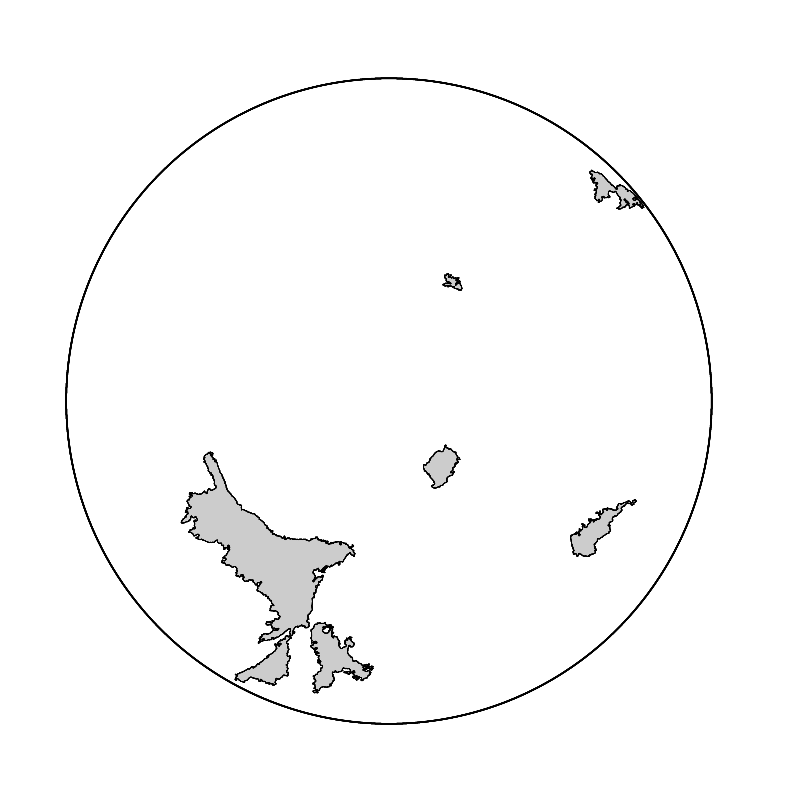

In [62]:
#=====cycles through contours=========

for i in range(len(cont)):

	x=np.append(x,len(cont[i]))

#=====only takes values of minimum surface length and calculates area======

	if len(cont[i]) <= 100:
		continue
	area=0.5*np.abs(np.dot(cont[i][:,0,0],np.roll(cont[i][:,0,1],1))-np.dot(cont[i][:,0,1],np.roll(cont[i][:,0,0],1)))
	arcar=(area*(dattoarc**2))
	if arcar > 1000:

#=====finds centroid=======

		chpts=len(cont[i])
		cent=[np.mean(cont[i][:,0,0]),np.mean(cont[i][:,0,1])]

#===remove quiet sun regions encompassed by coronal holes======

		if (cand[np.max(cont[i][:,0,0])+1,cont[i][np.where(cont[i][:,0,0] == np.max(cont[i][:,0,0]))[0][0],0,1]] > 0) and (iarr[np.max(cont[i][:,0,0])+1,cont[i][np.where(cont[i][:,0,0] == np.max(cont[i][:,0,0]))[0][0],0,1]] > 0):
			mahotas.polygon.fill_polygon(np.array(list(zip(cont[i][:,0,1],cont[i][:,0,0]))),slate)
			iarr[np.where(slate == 1)]=0
			slate[:]=0

		else:

#====create a simple centre point======

			arccent=csys.all_pix2world(cent[0],cent[1],0)

#====classifies off limb CH regions========

			if (((arccent[0]**2)+(arccent[1]**2)) > (rs**2)) or (np.sum(np.array(csys.all_pix2world(cont[i][0,0,0],cont[i][0,0,1],0))**2) > (rs**2)):
				mahotas.polygon.fill_polygon(np.array(list(zip(cont[i][:,0,1],cont[i][:,0,0]))),offarr)
			else:

#=====classifies on disk coronal holes=======

				mahotas.polygon.fill_polygon(np.array(list(zip(cont[i][:,0,1],cont[i][:,0,0]))),slate)
				poslin=np.where(slate == 1)
				slate[:]=0
				print(poslin)

#====create an array for magnetic polarity========

				pos=np.zeros((len(poslin[0]),2),dtype=np.uint)
				pos[:,0]=np.array((poslin[0]-(s[0]/2))*convermul+(s[1]/2),dtype=np.uint)
				pos[:,1]=np.array((poslin[1]-(s[0]/2))*convermul+(s[1]/2),dtype=np.uint)
				npix=list(np.histogram(datm[pos[:,0],pos[:,1]],bins=np.arange(np.round(np.min(datm[pos[:,0],pos[:,1]]))-0.5,np.round(np.max(datm[pos[:,0],pos[:,1]]))+0.6,1)))
				npix[0][np.where(npix[0]==0)]=1
				npix[1]=npix[1][:-1]+0.5

				wh1=np.where(npix[1] > 0)
				wh2=np.where(npix[1] < 0)

#=====magnetic cut offs dependant on area=========

				if np.absolute((np.sum(npix[0][wh1])-np.sum(npix[0][wh2]))/np.sqrt(np.sum(npix[0]))) <= 10 and arcar < 9000:
					continue
				if np.absolute(np.mean(datm[pos[:,0],pos[:,1]])) < garr[int(cent[0]),int(cent[1])] and arcar < 40000:
					continue
				iarr[poslin]=ident

#====create an accurate center point=======

				ypos=np.sum((poslin[0])*np.absolute(hg.lat[poslin]))/np.sum(np.absolute(hg.lat[poslin]))
				xpos=np.sum((poslin[1])*np.absolute(hg.lon[poslin]))/np.sum(np.absolute(hg.lon[poslin]))

				arccent=csys.all_pix2world(xpos,ypos,0)

#======calculate average angle coronal hole is subjected to======

				dist=np.sqrt((arccent[0]**2)+(arccent[1]**2))
				ang=np.arcsin(dist/rs)

#=====calculate area of CH with minimal projection effects======

				trupixar=abs(area/np.cos(ang))
				truarcar=trupixar*(dattoarc**2)
				trummar=truarcar*((6.96e+08/rs)**2)


#====find CH extent in lattitude and longitude========

				maxxlat=hg.lat[cont[i][np.where(cont[i][:,0,0] == np.max(cont[i][:,0,0]))[0][0],0,1],np.max(cont[i][:,0,0])]
				maxxlon=hg.lon[cont[i][np.where(cont[i][:,0,0] == np.max(cont[i][:,0,0]))[0][0],0,1],np.max(cont[i][:,0,0])]
				maxylat=hg.lat[np.max(cont[i][:,0,1]),cont[i][np.where(cont[i][:,0,1] == np.max(cont[i][:,0,1]))[0][0],0,0]]
				maxylon=hg.lon[np.max(cont[i][:,0,1]),cont[i][np.where(cont[i][:,0,1] == np.max(cont[i][:,0,1]))[0][0],0,0]]
				minxlat=hg.lat[cont[i][np.where(cont[i][:,0,0] == np.min(cont[i][:,0,0]))[0][0],0,1],np.min(cont[i][:,0,0])]
				minxlon=hg.lon[cont[i][np.where(cont[i][:,0,0] == np.min(cont[i][:,0,0]))[0][0],0,1],np.min(cont[i][:,0,0])]
				minylat=hg.lat[np.min(cont[i][:,0,1]),cont[i][np.where(cont[i][:,0,1] == np.min(cont[i][:,0,1]))[0][0],0,0]]
				minylon=hg.lon[np.min(cont[i][:,0,1]),cont[i][np.where(cont[i][:,0,1] == np.min(cont[i][:,0,1]))[0][0],0,0]]

#=====CH centroid in lat/lon=======

				centlat=hg.lat[int(ypos),int(xpos)]
				centlon=hg.lon[int(ypos),int(xpos)]

#====caluclate the mean magnetic field=====

				mB=np.mean(datm[pos[:,0],pos[:,1]])
				mBpos=np.sum(npix[0][wh1]*npix[1][wh1])/np.sum(npix[0][wh1])
				mBneg=np.sum(npix[0][wh2]*npix[1][wh2])/np.sum(npix[0][wh2])

#=====finds coordinates of CH boundaries=======

				Ywb,Xwb=csys.all_pix2world(cont[i][np.where(cont[i][:,0,0] == np.max(cont[i][:,0,0]))[0][0],0,1],np.max(cont[i][:,0,0]),0)
				Yeb,Xeb=csys.all_pix2world(cont[i][np.where(cont[i][:,0,0] == np.min(cont[i][:,0,0]))[0][0],0,1],np.min(cont[i][:,0,0]),0)
				Ynb,Xnb=csys.all_pix2world(np.max(cont[i][:,0,1]),cont[i][np.where(cont[i][:,0,1] == np.max(cont[i][:,0,1]))[0][0],0,0],0)
				Ysb,Xsb=csys.all_pix2world(np.min(cont[i][:,0,1]),cont[i][np.where(cont[i][:,0,1] == np.min(cont[i][:,0,1]))[0][0],0,0],0)

				width=round(maxxlon.value)-round(minxlon.value)

				if minxlon.value >= 0.0 : eastl='W'+str(int(np.round(minxlon.value)))
				else : eastl='E'+str(np.absolute(int(np.round(minxlon.value))))
				if maxxlon.value >= 0.0 : westl='W'+str(int(np.round(maxxlon.value)))
				else : westl='E'+str(np.absolute(int(np.round(maxxlon.value))))

				if centlat >= 0.0 : centlat='N'+str(int(np.round(centlat.value)))
				else : centlat='S'+str(np.absolute(int(np.round(centlat.value))))
				if centlon >= 0.0 : centlon='W'+str(int(np.round(centlon.value)))
				else : centlon='E'+str(np.absolute(int(np.round(centlon.value))))

#====insertions of CH properties into property array=====

				props[0,ident+1]=str(ident)
				props[1,ident+1]=str(np.round(arccent[0]))
				props[2,ident+1]=str(np.round(arccent[1]))
				props[3,ident+1]=str(centlon+centlat)
				props[4,ident+1]=str(np.round(Xeb))
				props[5,ident+1]=str(np.round(Yeb))
				props[6,ident+1]=str(np.round(Xwb))
				props[7,ident+1]=str(np.round(Ywb))
				props[8,ident+1]=str(np.round(Xnb))
				props[9,ident+1]=str(np.round(Ynb))
				props[10,ident+1]=str(np.round(Xsb))
				props[11,ident+1]=str(np.round(Ysb))
				props[12,ident+1]=str(eastl+'-'+westl)
				props[13,ident+1]=str(width)
				props[14,ident+1]='{:.1e}'.format(trummar/1e+12)
				props[15,ident+1]=str(np.round((arcar*100/(np.pi*(rs**2))),1))
				props[16,ident+1]=str(np.round(mB,1))
				props[17,ident+1]=str(np.round(mBpos,1))
				props[18,ident+1]=str(np.round(mBneg,1))
				props[19,ident+1]=str(np.round(np.max(npix[1]),1))
				props[20,ident+1]=str(np.round(np.min(npix[1]),1))
				tbpos= np.sum(datm[pos[:,0],pos[:,1]][np.where(datm[pos[:,0],pos[:,1]] > 0)])
				props[21,ident+1]='{:.1e}'.format(tbpos)
				tbneg= np.sum(datm[pos[:,0],pos[:,1]][np.where(datm[pos[:,0],pos[:,1]] < 0)])
				props[22,ident+1]='{:.1e}'.format(tbneg)
				props[23,ident+1]='{:.1e}'.format(mB*trummar*1e+16)
				props[24,ident+1]='{:.1e}'.format(mBpos*trummar*1e+16)
				props[25,ident+1]='{:.1e}'.format(mBneg*trummar*1e+16)

#=====sets up code for next possible coronal hole=====

				ident=ident+1

#=====sets ident back to max value of iarr======

ident=ident-1
np.savetxt('ch_summary.txt', props, fmt = '%s')

#====create image in output folder=======
#from scipy.misc import bytescale

from skimage.util import img_as_ubyte

def rescale01(arr, cmin=None, cmax=None, a=0, b=1):
    if cmin or cmax:
        arr = np.clip(arr, cmin, cmax)
    return (b-a) * ((arr - np.min(arr)) / (np.max(arr) - np.min(arr))) + a


def plot_tricolor():
	tricolorarray = np.zeros((4096, 4096, 3))

	data_a = img_as_ubyte(rescale01(np.log10(data), cmin = 1.2, cmax = 3.9))
	data_b = img_as_ubyte(rescale01(np.log10(datb), cmin = 1.4, cmax = 3.0))
	data_c = img_as_ubyte(rescale01(np.log10(datc), cmin = 0.8, cmax = 2.7))

	tricolorarray[..., 0] = data_c/np.max(data_c)
	tricolorarray[..., 1] = data_b/np.max(data_b)
	tricolorarray[..., 2] = data_a/np.max(data_a)


	fig, ax = plt.subplots(figsize = (10, 10))

	plt.imshow(tricolorarray, origin = 'lower')#, extent = )
	cs=plt.contour(xgrid,ygrid,slate,colors='white',linewidths=0.5)
	plt.savefig('tricolor.png')
	plt.close()

def plot_mask(slate=slate):
	chs=np.where(iarr > 0)
	slate[chs]=1
	slate=np.array(slate,dtype=np.uint8)
	cont,heir=cv2.findContours(slate,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

	circ[:]=0
	r=(rs/dattoarc)
	w=np.where((xgrid-center[0])**2+(ygrid-center[1])**2 <= r**2)
	circ[w]=1.0

	plt.figure(figsize=(10,10))
	plt.xlim(143,4014)
	plt.ylim(143,4014)
	plt.scatter(chs[1],chs[0],marker='s',s=0.0205,c='black',cmap='viridis',edgecolor='none',alpha=0.2)
	plt.gca().set_aspect('equal', adjustable='box')
	plt.axis('off')
	cs=plt.contour(xgrid,ygrid,slate,colors='black',linewidths=0.5)
	cs=plt.contour(xgrid,ygrid,circ,colors='black',linewidths=1.0)

	plt.savefig('CH_mask_'+hedb["DATE"]+'.png',transparent=True)
	#plt.close()
#====stores all CH properties in a text file=====

plot_tricolor()
plot_mask()

#====EOF====